<a href="https://colab.research.google.com/github/freshmea/kuIotBigdataClass/blob/main/pytorch/kaggle_titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
folder = "/home/aa/kuIotBigdataClass/pytorch/data/titanic/"
data = pd.read_csv(folder + "train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
embarked_df = (
    data[["Embarked", "Survived", "PassengerId"]]
    .dropna()
    .groupby(["Embarked", "Survived"])
    .count()
    .unstack()
)

<Axes: xlabel='Embarked'>

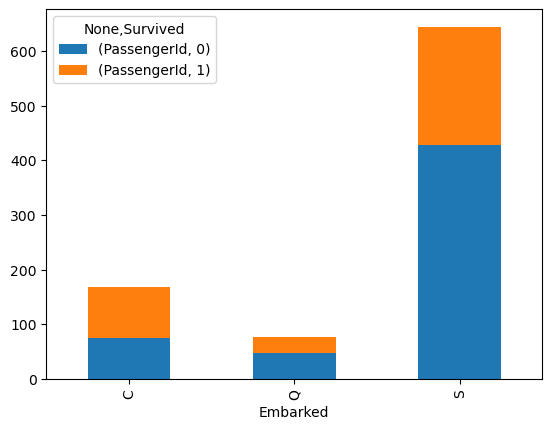

In [51]:
embarked_df.plot.bar(stacked=True)

In [52]:
embarked_df["Survived_rate"] = embarked_df.iloc[:, 1] / (
    embarked_df.iloc[:, 0] + embarked_df.iloc[:, 1]
)

In [53]:
embarked_df

PassengerId      Survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.553571
Q                 47   30      0.389610
S                427  217      0.336957

In [54]:
sex_df = (
    data[["Sex", "Survived", "PassengerId"]]
    .dropna()
    .groupby(["Sex", "Survived"])
    .count()
    .unstack()
)

In [55]:
sex_df

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

<Axes: xlabel='Sex'>

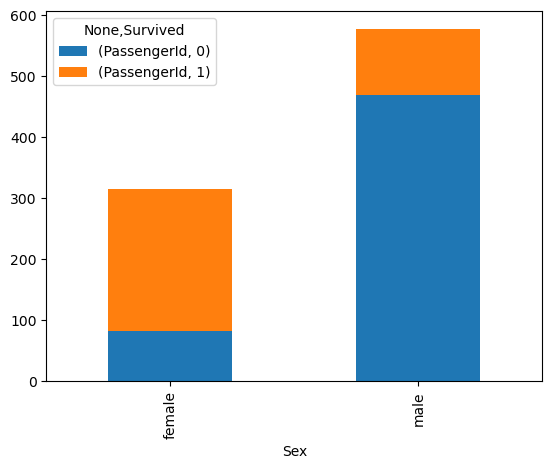

In [56]:
sex_df.plot.bar(stacked=True)

In [57]:
sex_df["Survived_rate"] = sex_df.iloc[:, 1] / (sex_df.iloc[:, 0] + sex_df.iloc[:, 1])

In [58]:
sex_df

PassengerId      Survived_rate
Survived           0    1              
Sex                                    
female            81  233      0.742038
male             468  109      0.188908

In [59]:
pClass_df = (
    data[["Pclass", "Survived", "PassengerId"]]
    .dropna()
    .groupby(["Pclass", "Survived"])
    .count()
    .unstack()
)

<Axes: xlabel='Pclass'>

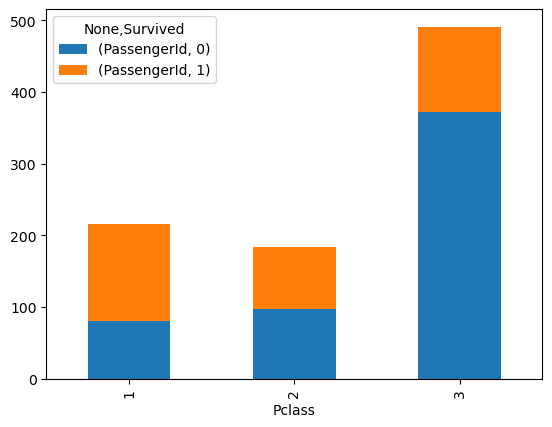

In [60]:
pClass_df.plot.bar(stacked=True)

In [61]:
pClass_df["Survived_rate"] = pClass_df.iloc[:, 1] / (
    pClass_df.iloc[:, 0] + pClass_df.iloc[:, 1]
)

In [62]:
pClass_df

PassengerId      Survived_rate
Survived           0    1              
Pclass                                 
1                 80  136      0.629630
2                 97   87      0.472826
3                372  119      0.242363

(array([[ 26.,  71., 146.,  86.,  53.,  25.,  13.,   4.],
        [ 64., 115., 230., 155.,  86.,  42.,  17.,   5.]]),
 array([ 0.42  , 10.3675, 20.315 , 30.2625, 40.21  , 50.1575, 60.105 ,
        70.0525, 80.    ]),
 <a list of 2 BarContainer objects>)

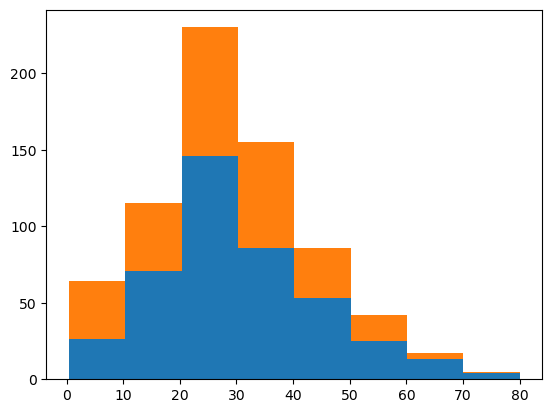

In [63]:
plt.hist(
    x=[data["Age"][data["Survived"] == 0], data["Age"][data["Survived"] == 1]],
    bins=8,
    histtype="barstacked",
    label=["Dead", "Survived"],
)

In [64]:
data_df_corr = pd.get_dummies(data, columns=["Sex"], drop_first=True)
data_df_corr = pd.get_dummies(data_df_corr, columns=["Embarked"], drop_first=True)

In [65]:
data_df_corr

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False


In [66]:
data_df_corr.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
data_corr = data_df_corr.corr()

In [67]:
data_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
Embarked_S,0.022148,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


<Axes: >

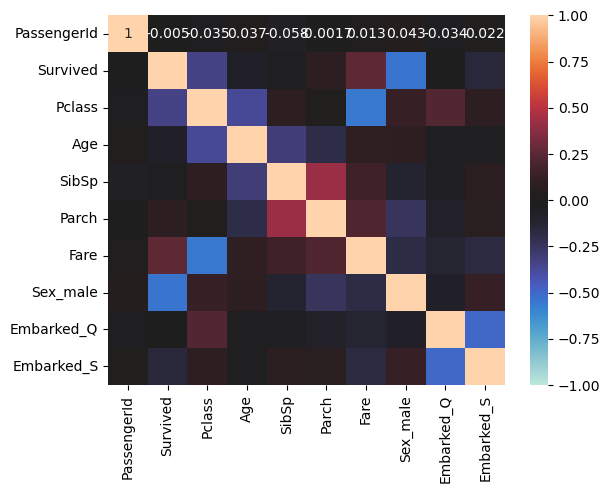

In [68]:
sns.heatmap(data_corr, vmax=1, vmin=-1, center=0, annot=True)

In [69]:
test = pd.read_csv(folder + "test.csv")

all_df = pd.concat([data, test], sort=False).reset_index(drop=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [70]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [71]:
fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()
fare_mean

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [72]:
fare_mean.columns = ["Pclass", "Fare_mean"]
fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [73]:
all_df = pd.merge(all_df, fare_mean, how="left", on="Pclass")

In [74]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = all_df["Fare_mean"]

In [75]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Fare_mean    1309 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 133.1+ KB


In [76]:
all_df["Name"].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [77]:
name_df = all_df["Name"].str.split("[,.]", expand=True)
name_df

,0,1,2,3
0,Braund,Mr,Owen Harris,None
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer),None
2,Heikkinen,Miss,Laina,None
3,Futrelle,Mrs,Jacques Heath (Lily May Peel),None
4,Allen,Mr,William Henry,None
...,...,...,...,...
1304,Spector,Mr,Woolf,None
1305,Oliva y Ocana,Dona,Fermina,None
1306,Saether,Mr,Simon Sivertsen,None
1307,Ware,Mr,Frederick,None


In [78]:
name_df.columns = ["family_name", "hornorific", "first_name", "None"]

In [79]:
name_df.drop(columns=["None"], inplace=True)
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["hornorific"] = name_df["hornorific"].str.strip()
name_df["first_name"] = name_df["first_name"].str.strip

In [80]:
name_df["hornorific"].value_counts()

hornorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [81]:
all_df = pd.concat([all_df, name_df], axis=1)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Fare_mean    1309 non-null   float64
 13  family_name  1309 non-null   object 
 14  hornorific   1309 non-null   object 
 15  first_name   1309 non-null   object 
dtypes: float64(4), int64(4), object(8)
memory usage: 163.8+ KB


<Axes: xlabel='hornorific', ylabel='Age'>

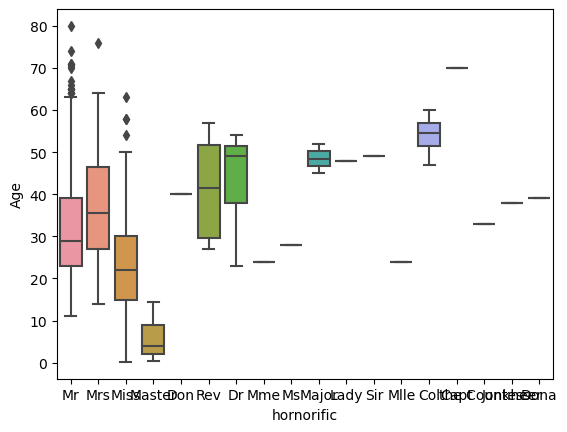

In [82]:
sns.boxplot(x="hornorific", y="Age", data=all_df)

<Axes: xlabel='hornorific'>

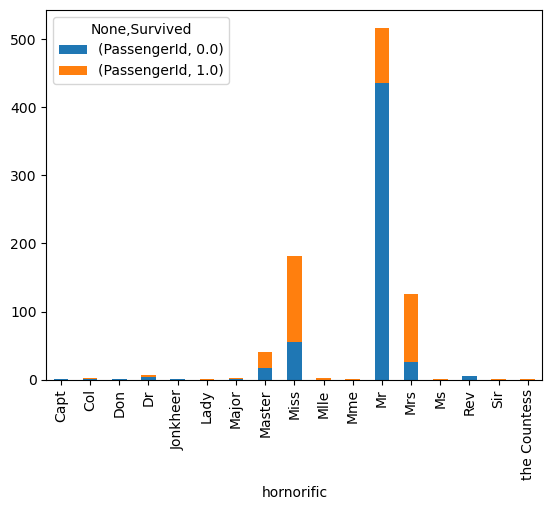

In [83]:
hornorific_df = (
    all_df[["hornorific", "Survived", "PassengerId"]]
    .dropna()
    .groupby(["hornorific", "Survived"])
    .count()
    .unstack()
)
hornorific_df.plot.bar(stacked=True)

In [84]:
hornorific_df_age_mean = (
    all_df[["hornorific", "Age"]].groupby("hornorific").mean().reset_index()
)
hornorific_df_age_mean

,hornorific,Age
0,Capt,70.000000
1,Col,54.000000
2,Don,40.000000
3,Dona,39.000000
4,Dr,43.571429
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,5.482642
9,Miss,21.774238


In [85]:
hornorific_df_age_mean.columns = ["hornorific", "Age_mean"]

In [86]:
all_df = pd.merge(all_df, hornorific_df_age_mean, how="left", on="hornorific")
all_df.loc[all_df["Age"].isnull(), "Age"] = all_df["Age_mean"]

In [87]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Fare_mean    1309 non-null   float64
 13  family_name  1309 non-null   object 
 14  hornorific   1309 non-null   object 
 15  first_name   1309 non-null   object 
 16  Age_mean     1309 non-null   float64
dtypes: float64(5), int64(4), object(8)
memory usage: 174.0+ KB


In [88]:
all_df.drop("Cabin", axis=1, inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1307 non-null   object 
 11  Fare_mean    1309 non-null   float64
 12  family_name  1309 non-null   object 
 13  hornorific   1309 non-null   object 
 14  first_name   1309 non-null   object 
 15  Age_mean     1309 non-null   float64
dtypes: float64(5), int64(4), object(7)
memory usage: 163.8+ KB


In [89]:
predictors = ["Pclass", "Age", "Fare", "Embarked", "hornorific"]
outcome = "Survived"

X = all_df[predictors]
y = all_df[outcome]
X_oneHot = pd.get_dummies(X, columns=["Embarked", "hornorific"], drop_first=True)
X_oneHot = pd.DataFrame(StandardScaler().fit_transform(X_oneHot))
X_train = X_oneHot.iloc[:891, :]
X_test = X_oneHot.iloc[891:, :]
y_train = y.iloc[:891]
y_test = y.iloc[891:]

In [90]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [91]:
y_pred = model.predict(X_test)
passengerId = test["PassengerId"]
submission = pd.DataFrame({"PassengerId": passengerId, "Survived": y_pred})
submission = submission.astype(int)
submission.to_csv("submission.csv", index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
